Analyse the mapping of OpenAlex subjects to those of the repositories

In [13]:
import json
from collections import Counter
from matplotlib import pyplot as plt

In [14]:
subjects = json.load(open('../data/openalex/repo_mapping.json'))
len(subjects)  # no. of mapped subjects

1272

In [15]:
lengths = [len(v['docs']) for v in subjects.values()]
sum(lengths) / len(lengths)  # avg. no. of documents per subject

7.116352201257862

In [27]:
sum(lengths)  # total number of assignments

9052

In [19]:
sorted_lengths = sorted(lengths, reverse=True)
top = sorted_lengths[:5]  # no. of docs of the five subjects with the most docs
for subject in subjects:
  if len(subjects[subject]['docs']) in top:
    print(subject, len(subjects[subject]['docs']))

spectroscopy 70
sustainability 124
climate change 154
molecular dynamics 76
mass spectrometry 87


In [16]:
cnt = Counter(lengths)
print(cnt.most_common(5))  # most common no. of documents per subject

[(1, 301), (2, 196), (3, 140), (4, 98), (5, 85)]


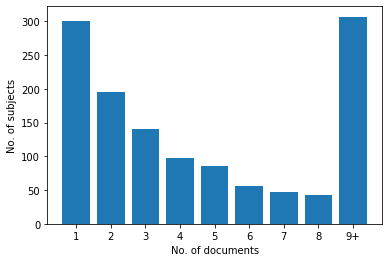

In [17]:
x = [str(i) for i in range(1, 10)]
x[-1] += '+'
y = [cnt[i] for i in range(1, 9)] + [sum(cnt[i] for i in cnt if i >= 9)]
plt.bar(range(1, 10), y)
plt.xlabel('No. of documents')
plt.ylabel('No. of subjects')
plt.xticks(range(1, 10), x)
plt.show()

Now that we have seen some basic facts about the mapping, let's classify them by field.

In [26]:
openalex = json.load(open('../data/openalex/subjects.json'))
fields = [s['name'] for s in openalex.values() if s['level'] == 0]
subject_cnt = {name: len(v['docs']) for name, v in subjects.items()}
distribution = {f: 0 for f in fields}
for subject in subjects:
  ancestors = openalex[subjects[subject]['openalex_id']]['ancestors']
  for ancestor in ancestors:
    if ancestor['level'] == 0:
      distribution[ancestor['display_name']] += 1
distribution
  

{'Medicine': 230,
 'Chemistry': 193,
 'Biology': 322,
 'Computer science': 145,
 'Materials science': 142,
 'Engineering': 150,
 'Psychology': 159,
 'Physics': 220,
 'Political science': 184,
 'Mathematics': 128,
 'Business': 64,
 'Sociology': 82,
 'Geography': 130,
 'Art': 51,
 'Environmental science': 41,
 'Economics': 143,
 'Geology': 127,
 'History': 85,
 'Philosophy': 112}

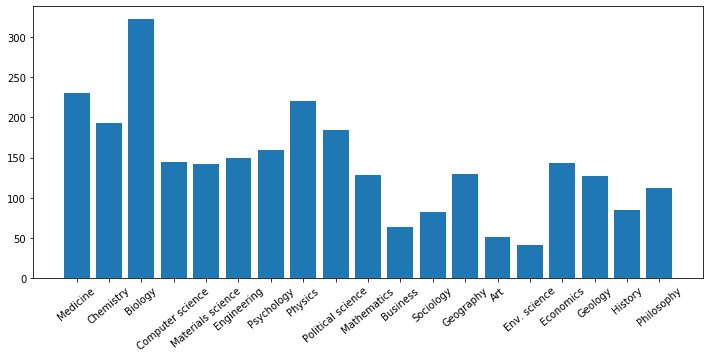

In [34]:
x = list(distribution.keys())
x[x.index('Environmental science')] = 'Env. science'
plt.figure(figsize=(12,5))
plt.bar(range(len(distribution)), distribution.values())
plt.xticks(range(len(distribution)), x, rotation=40)
plt.show()

That is very nice. We have assignments that belong to all fields, and in many cases more than 100 (all but Business, Sociology, Art, Env. science and History). For Medicine, Biology and Physics we have more than 200 assignments.

Now let's see how many subjects each document has.

In [35]:
docs = {}
for subject in subjects:
  for doc in subjects[subject]['docs']:
    if doc in docs:
      docs[doc].append(subject)
    else:
      docs[doc] = [subject]
len(docs)  # no. of documents

7145

In [36]:
doc_cnt = Counter([len(v) for v in docs.values()])
doc_cnt.most_common(5)  # 5 most common number of subjects per document

[(1, 5575), (2, 1292), (3, 234), (4, 36), (5, 5)]

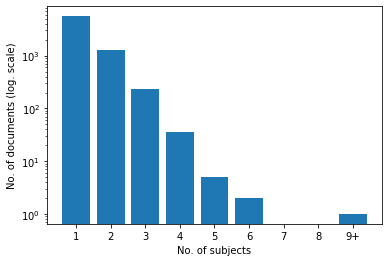

In [40]:
x = [str(i) for i in range(1, 10)]
x[-1] += '+'
y = [doc_cnt[i] for i in range(1, 9)] + [sum(doc_cnt[i] for i in cnt if i >= 9)]
plt.bar(range(1, 10), y)
plt.xlabel('No. of subjects')
plt.ylabel('No. of documents (log. scale)')
plt.yscale('log')
plt.xticks(range(1, 10), x)
plt.show()

In [47]:
sorted_docs = sorted([len(v) for v in docs.values()], reverse=True)
top = sorted_docs[:5]  # no. of subjects of the five docs with the most subjects
for doc in docs:
  if len(docs[doc]) in top:
    print(doc, len(docs[doc]), docs[doc])

oai:edoc.hu-berlin.de:18452/19245 5 ['sustainability', 'climate change', 'land use', 'nitrogen', 'livestock']
oai:edoc.hu-berlin.de:18452/3836 5 ['sustainability', 'climate change', 'renewable energy', 'solar energy', 'rural development']
oai:edoc.hu-berlin.de:18452/17163 10 ['sustainability', 'sustainable development', 'human rights', 'poverty', 'social responsibility', 'capacity building', 'autonomy', 'social change', 'hospitality', 'social work']
oai:edoc.hu-berlin.de:18452/3857 5 ['climate change', 'business model', 'irrigation', 'livestock', 'crop production']
oai:edoc.hu-berlin.de:18452/3820 5 ['sustainable development', 'tourism', 'community development', 'ecotourism', 'crop production']
oai:refubium.fu-berlin.de:fub188/10504 6 ['magnesium', 'ammonia', 'potassium', 'urea', 'chloride', 'sodium']
oai:refubium.fu-berlin.de:fub188/1998 5 ['semiotics', 'philosophy', 'cognition', 'law', 'sociology']
oai:refubium.fu-berlin.de:fub188/17172 6 ['law', 'legislation', 'legislation', 'consti